In [1]:
#Importing Numpy, Pandas, Datetime and other important packages,etc.

import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import pandas_datareader.data as web
import datetime as dt
from pylab import mpl, plt
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
# import quantstats
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Defining the time period

start = dt.datetime(2016,1,1)
end = dt.datetime(2020,12,31)

In [3]:
#  Use the ticker and reading CSV file of each stocks for importing dataset from Yahoo Finance.

# DowJones = {'df': web.DataReader("^DJI",'yahoo',start,end), 'name': 'Dow Jones Industrial Average'}
# EuroStoxx = {'df': web.DataReader("^STOXX50E",'yahoo',start,end), 'name': 'Euro Stoxx 50'}
# MSCI = {'df': pd.read_csv(r"C:\Users\Mehedi\Desktop\CFFM\MSCI-AC.csv"), 'name': 'MSCI AC Asia Pacific Index'}
# Alphabet = {'df': web.DataReader("GOOG",'yahoo',start,end), 'name': 'Alphabet Inc.'}
# AmericanGroup = {'df': web.DataReader("AIG",'yahoo',start,end), 'name': 'American International Group, Inc.'}
# Walmart = {'df': web.DataReader("WMT",'yahoo',start,end), 'name': 'Walmart Inc.'}
# SAP = {'df': web.DataReader("SAP",'yahoo',start,end), 'name': 'SAP'}
# Allianz = {'df': web.DataReader("ALV.DE",'yahoo',start,end), 'name': 'Allianz'}
# Ahold = {'df': web.DataReader("AD.AS",'yahoo',start,end), 'name': 'Ahold Delhaize'}
# SoftBank = {'df': web.DataReader("SFTBY",'yahoo',start,end), 'name': 'SoftBank Group Corp.'}
# DaiIchi = {'df': web.DataReader("8750.T",'yahoo',start,end), 'name': 'Dai-ichi Life Insurance'}
# FamilyMart = {'df': web.DataReader("FYRTY",'yahoo',start,end), 'name': 'Familymart Uny Holdings'}
# Gold = {'df': web.DataReader("GC=F",'yahoo',start,end), 'name': 'Gold'}
# Oil = {'df': web.DataReader("CL=F",'yahoo',start,end), 'name': 'Oil (Brent)'}
Bitcoin = {'df': pd.read_csv(r"C:\Users\Najmul Sharkar\Desktop\CFFM 2021\BTC-EUR.csv"), 'name': 'Bitcoin-Euro'}

In [4]:
#Please choose the Assets name as defined in the prevous cell to see the analysis.
dataset = Bitcoin

In [5]:
#define datasets name
df= dataset['df']
name = dataset['name']

In [6]:
#showing datasets
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/18/2019,9253.401367,9316.917969,9240.340820,9246.486328,9246.486328,1.466026e+10
1,9/19/2019,9248.524414,9319.454102,8917.574219,9292.973633,9292.973633,1.804724e+10
2,9/20/2019,9292.886719,9334.069336,9194.604492,9239.483398,9239.483398,1.337076e+10
3,9/21/2019,9241.304688,9245.341797,9075.292969,9092.541992,9092.541992,1.218296e+10
4,9/22/2019,9096.534180,9142.628906,9004.768555,9138.951172,9138.951172,1.197878e+10


In [7]:
# """
# The following code only be used while running MSCI AC Asia Pacific Index and BItCoin dataset(only for CSV files).
# """
df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index)

In [8]:
# Use Log Return as baseline return for normalizing the dataset.
df['Log_return'] = np.log(df["Close"]/df["Close"].shift(1))
    
#Creating 5 lag Features of previous five days log return. For example- Lag 2 is the 2 days previus log return.  
lags = 5
def create_lags(data):
    global cols_lag
    cols_lag = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        df[col] = df['Log_return'].shift(lag)
        cols_lag.append(col)
                            
create_lags(df)

# This code uses the first and second moment of the historical log returns to digitize the features data.
mu = df['Log_return'].mean()
v =df['Log_return'].std()
bins_d = [mu - v, mu, mu + v]

#Create bin wil be used to make the feature binary.
def create_bins(data, bins=[0]):
    global cols_bin,cols_bin_d
    cols_bin = []
    cols_bin_d = []
    for col in cols_lag:
        col_bin = col + '_bin'
        df[col_bin] = np.digitize(df[col], bins=bins)
        cols_bin.append(col_bin)
    for col in cols_lag:
        col_bin_d = col + '_d_bin'
        df[col_bin_d] = np.digitize(df[col], bins=bins_d)
        cols_bin_d.append(col_bin_d)
        

df.dropna(inplace=True)
create_bins(df)

#Creating a Movement column depends on the log return. If log returns is greater than 0, It's returns 1 (Upward) otherwise -1(Downward)
df['Movement'] = np.sign(df['Log_return']).astype(int)

In [9]:
# #Drop rows where movement is zero. 
df = df.drop(df[df['Movement']==0].index)


Total Number of Observations
447

Number of Upward and Downward Movement
 1    227
-1    220
Name: Movement, dtype: int64


<AxesSubplot:xlabel='Movement', ylabel='count'>

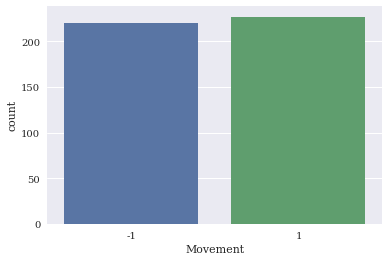

In [10]:
#printing the total movement counts and plot it to visualize.
print(f'\nTotal Number of Observations')
print(len(df))
print(f'\nNumber of Upward and Downward Movement')
print(df['Movement'].value_counts())
sns.countplot(df['Movement'])

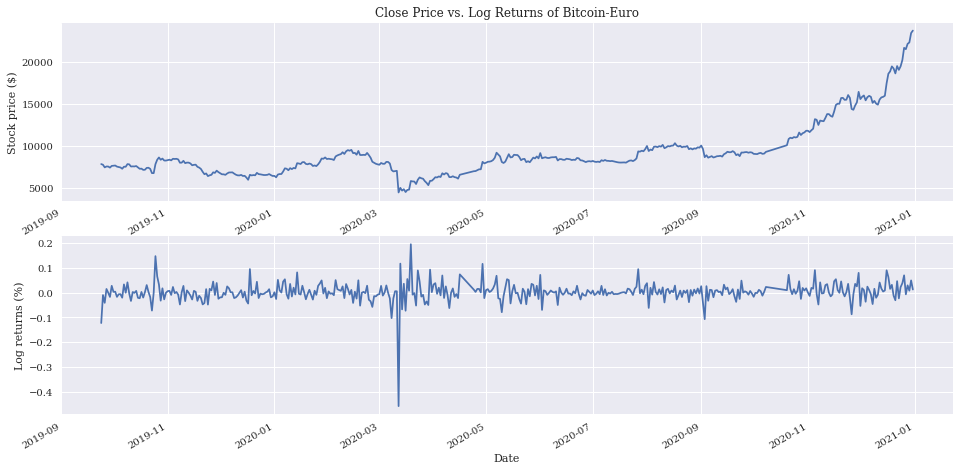

In [11]:
# Plotting evolution of the asset closing prices and Log returns over the time
fig, ax =plt.subplots(2, 1, figsize=(16, 8))

# Plotting the Assets closing price
df.Close.plot(ax=ax[0])
ax[0].set_ylabel('Stock price ($)')
ax[0].set_xlabel('')
ax[0].set_title('Close Price vs. Log Returns of '+ f'{name}')

# Plotting the Assets log return
df.Log_return.plot(ax=ax[1])
ax[1].set_ylabel('Log returns (%)')
fig.show()


Text(0.5, 1.0, 'Distribution of Bitcoin-Euro Log returns')

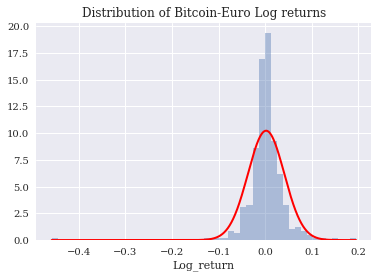

In [12]:
# Plotting the distribution of the log returns
ax = sns.distplot(df.Log_return, kde = False, norm_hist=True)                                    

xx = np.linspace(min(df.Log_return), max(df.Log_return), num=1000)                                                  
yy = scs.norm.pdf(xx, loc=df.Log_return.mean(), scale=df.Log_return.std())                                                         
ax.plot(xx, yy, 'r', lw=2)
ax.set_title('Distribution of ' + f'{name}'+' Log returns')

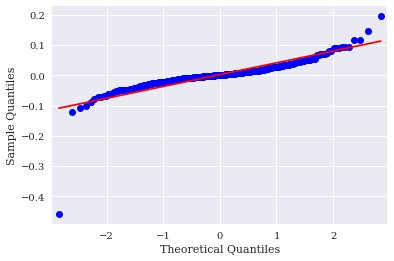

In [13]:
# Ploting QQ plot to investigate the outliers of Log return
qq = sm.qqplot(df.Log_return.values, line='s')
qq.show()

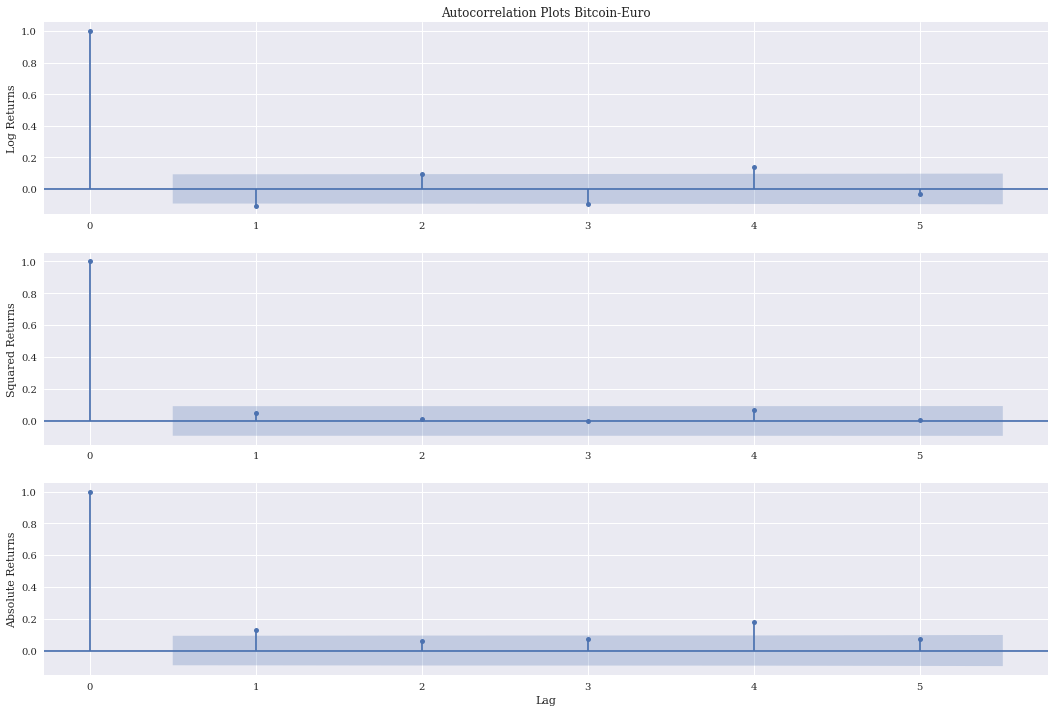

In [14]:
# Autocorrelation plot of log returns and squared/absolute versions ----

# specify the max amount of lags
lags = 5

fig, ax =plt.subplots(3, 1, figsize=(18, 12))
# Log returns ----
smt.graphics.plot_acf(df.Log_return, lags=lags , alpha=0.05, ax = ax[0])
ax[0].set_ylabel('Log Returns')
ax[0].set_title('Autocorrelation Plots '+f'{name}')
# squared returns ----
smt.graphics.plot_acf(df.Log_return ** 2, lags=lags, alpha=0.05, ax = ax[1])
ax[1].set_ylabel('Squared Returns')
ax[1].set_xlabel('')
ax[1].set_title('')
# absolute returns ----
smt.graphics.plot_acf(np.abs(df.Log_return), lags=lags, alpha=0.05, ax = ax[2])
ax[2].set_ylabel('Absolute Returns')
ax[2].set_title('')
ax[2].set_xlabel('Lag')
fig.show()

In [15]:
# Calculating the Descriptive statistics of asset
print('Statistical Description of '+ f'{name}')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print('Mean: {0:.4f}'.format(df.Log_return.mean()))
print('Median: {0:.4f}'.format(df.Log_return.median()))
print('Min: {0:.4f}'.format(df.Log_return.min()))
print('Max: {0:.4f}'.format(df.Log_return.max()))
print('Standard Deviation: {0:.4f}'.format(df.Log_return.std()))
print('Skewness: {0:.4f}'.format(df.Log_return.skew()))
print('Kurtosis: {0:.4f}'.format(df.Log_return.kurtosis())) #Kurtosis of std. Normal dist = 0
print('Jarque-Bera statistic: {stat:.4f} with p-value: {p_val:.4f}'.format(stat = scs.jarque_bera(df.Log_return.values)[0],
                                                                           p_val = scs.jarque_bera(df.Log_return.values)[1]))

Statistical Description of Bitcoin-Euro
Range of dates: 2019-09-24 - 2020-12-31
Number of observations: 447
Mean: 0.0019
Median: 0.0007
Min: -0.4578
Max: 0.1947
Standard Deviation: 0.0390
Skewness: -3.2139
Kurtosis: 44.6761
Jarque-Bera statistic: 37092.5423 with p-value: 0.0000


In [16]:
#Importing necessary library (e.g., Logistic Regression, Naive Bayes) from scikit-learn.

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
#defining class weight
C=1

In [18]:
#Defining the Machine Learning Classification models.
models = {
'lr': linear_model.LogisticRegression(C=C),
'gnb': GaussianNB()
}

The above code demonstrates five lags and five Digitized features so far. Now, It will fit into the machine learning model to see model performence in term of returns. Several combinations like 2 lag features, 3 lag features etc. will be applied.

In [19]:
#defining a function that fit into the model with Two Lag Features
def fit_models_2(data):
    mfit = {model: models[model].fit(df[['lag_1_bin','lag_2_bin']],
                                    df['Movement'])
            for model in models.keys()}
    
#function that derives all position values from the fitted models.  
def derive_positions_2(data):
    for model in models.keys():
        df['pos_2f_' + model] = models[model].predict(df[['lag_1_bin','lag_2_bin']])
        
#function that evaluates all resulting trading strategies. It multiplies the log return (base return) with the predicted return.            
def evaluate_strats_2(data):
    global sel_2
    sel_2 = []
    for model in models.keys():
        col = 'strat_2f_' + model
        df[col] = df['pos_2f_' + model] * df['Log_return']
        sel_2.append(col)
    sel_2.insert(0, 'Log_return')

In [20]:
# Appling 2 lag features into the model. 
fit_models_2(df)

# deriving the positions of 2 lag features. 
derive_positions_2(df)

#Evaluating the model performence with applying 2 lag features.
evaluate_strats_2(df)

In [21]:
#defining a function that fit into the model with Three Lag Features
def fit_models_3(data):
    mfit = {model: models[model].fit(df[['lag_1_bin','lag_2_bin','lag_3_bin']],
                                    df['Movement'])
    for model in models.keys()}

#function that derives all position values from the fitted models using 3 lag features.  
def derive_positions_3(data):
    for model in models.keys():
        df['pos_3f_' + model] = models[model].predict(df[['lag_1_bin','lag_2_bin','lag_3_bin']])
            
#function that evaluates all resulting trading strategies using 3 lag features.It multiplies the log return (base return) with the predicted return.   
def evaluate_strats_3(data):
    global sel_3
    sel_3 = []
    for model in models.keys():
        col = 'strat_3f_' + model
        df[col] = df['pos_3f_' + model] * df['Log_return']
        sel_3.append(col)
    sel_3.insert(0, 'Log_return')

# Appling 3 lag features into the model. 
fit_models_3(df)

# deriving the positions of 3 lag features. 
derive_positions_3(df)

#Evaluating the model performence with applying 3 lag features.
evaluate_strats_3(df)

In [22]:
#defining a function that fit into the model with Four Lag Features

def fit_models_4(data):
    mfit = {model: models[model].fit(df[['lag_1_bin','lag_2_bin','lag_3_bin','lag_4_bin']],
                                    df['Movement'])
            for model in models.keys()}

#function that derives all position values from the fitted models using four(4) lag features.        
def derive_positions_4(data):
    for model in models.keys():
        df['pos_4f_' + model] = models[model].predict(df[['lag_1_bin','lag_2_bin','lag_3_bin','lag_4_bin']])
            
#function that evaluates all resulting trading strategies using 3 lag features.It multiplies the log return (base return) with the predicted return.
def evaluate_strats_4(data):
    global sel_4
    sel_4 = []
    for model in models.keys():
        col = 'strat_4f_' + model
        df[col] = df['pos_4f_' + model] * df['Log_return']
        sel_4.append(col)
    sel_4.insert(0, 'Log_return')

# Appling 4 lag features into the model. 
fit_models_4(df)

# deriving the positions of 4 lag features. 
derive_positions_4(df)

#Evaluating the model performence with applying 4 lag features.
evaluate_strats_4(df)

In [23]:
#Defining a function that fit into the model with five Lag Features

def fit_models(data):
    mfit = {model: models[model].fit(df[cols_bin],
                                    df['Movement'])
        for model in models.keys()}

#function that derives all position values from the fitted models using five lag features. 
def derive_positions(data):
    for model in models.keys():
        df['pos_' + model] = models[model].predict(df[cols_bin])
            
#function that evaluates all resulting trading strategies using 3 lag features.It multiplies the log return (base return) with the predicted return.
def evaluate_strats(data):
    global sel
    sel = []
    for model in models.keys():
        col = 'strat_' + model
        df[col] = df['pos_' + model] * df['Log_return']
        sel.append(col)
    sel.insert(0, 'Log_return')

# Appling 5 lag features into the model. 
fit_models(df)

# deriving the positions of 5 lag features.
derive_positions(df)

#Evaluating the model performence with applying 5 lag features.
evaluate_strats(df)

In [24]:
#Defining a function that fit into the model with five Digitize Features

def fit_models_d(data):
    mfit = {model: models[model].fit(df[cols_bin_d],
                                    df['Movement'])
        for model in models.keys()}

#function that derives all position values from the fitted models using five Digitize Features
def derive_positions_d(data):
    for model in models.keys():
        df['pos_d_' + model] = models[model].predict(df[cols_bin_d])
        
#function that evaluates all resulting trading strategies using three lag features.It multiplies the log return (base return) with the predicted return.
def evaluate_strats_d(data):
    global sel_d
    sel_d = []
    for model in models.keys():
        col = 'strat_d_' + model
        df[col] = df['pos_d_' + model] * df['Log_return']
        sel_d.append(col)
    sel_d.insert(0, 'Log_return')

# Appling five digitize features into the model. 
fit_models_d(df)

# deriving the positions of five digitize features.
derive_positions_d(df)

#Evaluating the model performence with applying five digitize features.
evaluate_strats_d(df)

In [25]:
#Printing of returns of different number of features that are used in Logistics regression and Naive bayes.
print(f'\nReturns for Logistic regression and Naive Bayes for 2, 3, 4, 5 lag along with digitize features respectively')
print(f'\nReturns Using Two Lag Features')
print(df[sel_2].sum().apply(np.exp).round(2))
print(f'\nReturns Using Three Lag Features')
print(df[sel_3].sum().apply(np.exp).round(2))
print(f'\nReturns Using Four Lag Featuress')
print(df[sel_4].sum().apply(np.exp).round(2))
print(f'\nReturns Using Five lags feature')
print(df[sel].sum().apply(np.exp).round(2))
print(f'\nReturns Using Five Digitize feature')
print(df[sel_d].sum().apply(np.exp).round(2))


Returns for Logistic regression and Naive Bayes for 2, 3, 4, 5 lag along with digitize features respectively

Returns Using Two Lag Features
Log_return      2.37
strat_2f_lr     2.33
strat_2f_gnb    2.33
dtype: float64

Returns Using Three Lag Features
Log_return      2.37
strat_3f_lr     2.33
strat_3f_gnb    2.31
dtype: float64

Returns Using Four Lag Featuress
Log_return      2.37
strat_4f_lr     2.33
strat_4f_gnb    2.31
dtype: float64

Returns Using Five lags feature
Log_return    2.37
strat_lr      2.46
strat_gnb     3.01
dtype: float64

Returns Using Five Digitize feature
Log_return     2.37
strat_d_lr     1.67
strat_d_gnb    4.11
dtype: float64


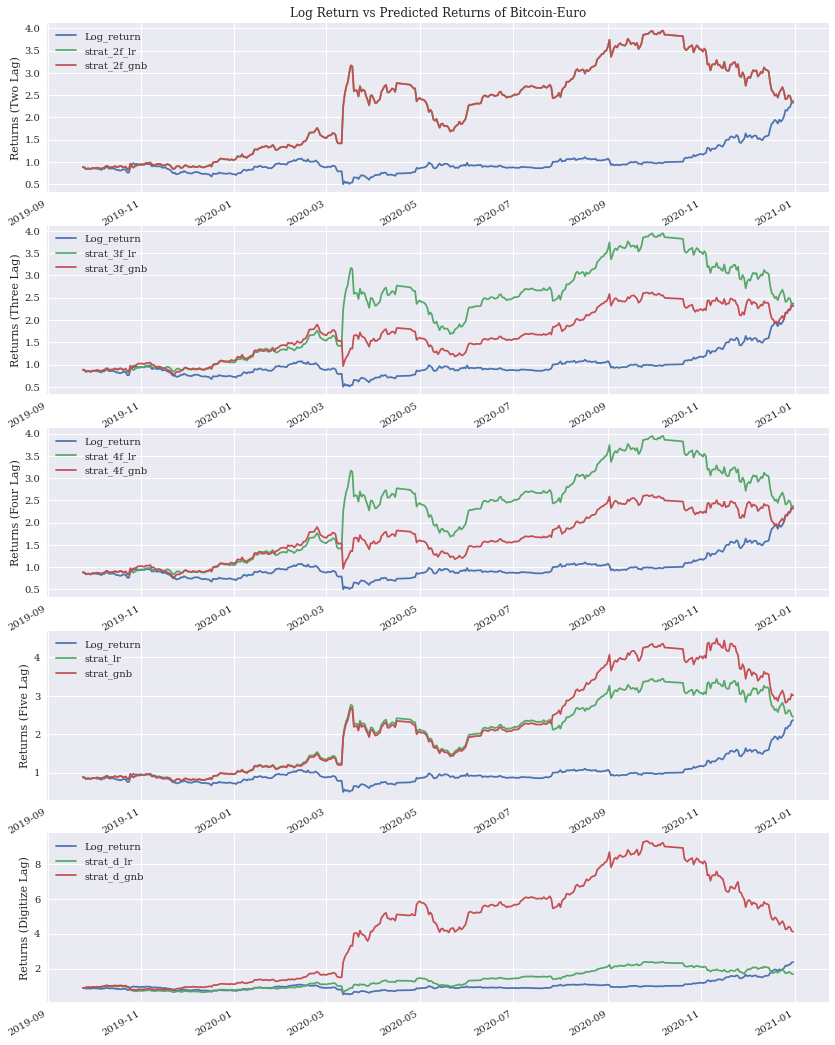

In [26]:
# Plotting assets Log Return and Model Predicted returns Over the time
fig, ax =plt.subplots(5, 1, figsize=(14, 20))

# Plotting the Assets Return of Two Lag Features
df[sel_2].cumsum().apply(np.exp).plot(ax=ax[0])
ax[0].set_ylabel('Returns (Two Lag)')
ax[0].set_xlabel('')
ax[0].set_title('Log Return vs Predicted Returns of '+ f'{name}')

# Plotting the Assets Return of Three Lag Features
df[sel_3].cumsum().apply(np.exp).plot(ax=ax[1])
ax[1].set_ylabel('Returns (Three Lag)')
ax[1].set_xlabel('')
ax[1].set_title('')

# Plotting the Assets Return of Four Lag Features
df[sel_4].cumsum().apply(np.exp).plot(ax=ax[2])
ax[2].set_ylabel('Returns (Four Lag)')
ax[2].set_xlabel('')
ax[2].set_title('')

# Plotting the Assets Return of Five Lag Features
df[sel].cumsum().apply(np.exp).plot(ax=ax[3])
ax[3].set_ylabel('Returns (Five Lag)')
ax[3].set_xlabel('')
ax[3].set_title('')

# Plotting the Assets Return of Digitize Lag Features
df[sel_d].cumsum().apply(np.exp).plot(ax=ax[4])
ax[4].set_ylabel('Returns (Digitize Lag)')
ax[4].set_xlabel('')
ax[4].set_title('')
fig.show()

In [27]:
#Printing Models Volatility
print(f'\nAnnual Volatility for Logistic Regression and Naive Bayes')
print(f'\nVolatility Using Two Lag Features')
print(df[sel_2].std() * 252 ** 0.5)
print(f'\nVolatility Using Three Lag Features')
print(df[sel_3].std() * 252 ** 0.5)
print(f'\nVolatility Using Four Lag Featuress')
print(df[sel_4].std() * 252 ** 0.5)
print(f'\nVolatility Using Five lag feature')
print(df[sel].std() * 252 ** 0.5)
print(f'\nVolatility Using Five Digitize feature')
print(df[sel_d].std() * 252 ** 0.5)


Annual Volatility for Logistic Regression and Naive Bayes

Volatility Using Two Lag Features
Log_return      0.619099
strat_2f_lr     0.619130
strat_2f_gnb    0.619130
dtype: float64

Volatility Using Three Lag Features
Log_return      0.619099
strat_3f_lr     0.619130
strat_3f_gnb    0.619147
dtype: float64

Volatility Using Four Lag Featuress
Log_return      0.619099
strat_4f_lr     0.619130
strat_4f_gnb    0.619147
dtype: float64

Volatility Using Five lag feature
Log_return    0.619099
strat_lr      0.619036
strat_gnb     0.618620
dtype: float64

Volatility Using Five Digitize feature
Log_return     0.619099
strat_d_lr     0.619589
strat_d_gnb    0.617817
dtype: float64


Sequential Train Test Split

In [28]:
#Fifty percent of the dataset is used for training the model and rest is used for the testing according to the model.
split = int(len(df)*.6)
train =df.iloc[:split].copy()
test = df.iloc[split:].copy()

In [29]:
#fit the model into the training and testing dataset, derive the position and evaluate the performence in test set using Two lag features.
fit_models_2(train)
derive_positions_2(test)
evaluate_strats_2(test)

In [30]:
#fit the model into the training and testing dataset, derive the position and evaluate the performence in test set Three lag features.

fit_models_3(train)
derive_positions_3(test)
evaluate_strats_3(test)

In [31]:
#fit the model into the training and testing dataset, derive the position and evaluate the performence in test set using four lag features.

fit_models_4(train)
derive_positions_4(test)
evaluate_strats_4(test)

In [32]:
#fit the model into the training and testing dataset, derive the position and evaluate the performence in test set using five lag features.

fit_models(train)
derive_positions(test)
evaluate_strats(test)

In [33]:
#fit the model into the training and testing dataset, derive the position and evaluate the performence in test set using five digitize features.

fit_models_d(train)
derive_positions_d(test)
evaluate_strats_d(test)

In [34]:
#Printing Models return in Test set
print(f'\nReturns for Logistic regression and Naive Bayes for test data for '+ f'{name}')
print(f'\nUsing Two Lag Features')
print(test[sel_2].sum().apply(np.exp).round(2))
print(f'\nUsing Three Lag Features')
print(test[sel_3].sum().apply(np.exp).round(2))

print(f'\nUsing Four Lag Featuress')
print(test[sel_4].sum().apply(np.exp).round(2))
print(f'\nUsing Five lags feature')
print(test[sel].sum().apply(np.exp).round(2))
print(f'\nUsing Five Digitize feature')
print(test[sel_d].sum().apply(np.exp).round(2))


Returns for Logistic regression and Naive Bayes for test data for Bitcoin-Euro

Using Two Lag Features
Log_return      2.67
strat_2f_lr     0.93
strat_2f_gnb    0.93
dtype: float64

Using Three Lag Features
Log_return      2.67
strat_3f_lr     0.93
strat_3f_gnb    1.45
dtype: float64

Using Four Lag Featuress
Log_return      2.67
strat_4f_lr     0.93
strat_4f_gnb    1.45
dtype: float64

Using Five lags feature
Log_return    2.67
strat_lr      1.12
strat_gnb     1.42
dtype: float64

Using Five Digitize feature
Log_return     2.67
strat_d_lr     1.17
strat_d_gnb    0.73
dtype: float64


In [35]:
#Showing the accuracy of the test data 
print(f'\nAccuracy Score of Logistic regression and Naive Bayes for test data')
print(f'\nUsing 2 features lag:')
print(f'Logistic Regression:',(accuracy_score(test['Movement'],test['pos_2f_lr']).round(2)))
print(f'Naive Bayes        :',(accuracy_score(test['Movement'],test['pos_2f_gnb']).round(2)))

print(f'\nUsing 3 features lag:')
print(f'Logistic Regression:',(accuracy_score(test['Movement'],test['pos_3f_lr']).round(2)))
print(f'Naive Bayes        :',(accuracy_score(test['Movement'],test['pos_3f_gnb']).round(2)))

print(f'\nUsing 4 features lag:')
print(f'Logistic Regression:',(accuracy_score(test['Movement'],test['pos_4f_lr']).round(2)))
print(f'Naive Bayes        :',(accuracy_score(test['Movement'],test['pos_4f_gnb']).round(2)))

print(f'\nUsing 5 features lag:')
print(f'Logistic Regression:',(accuracy_score(test['Movement'],test['pos_lr']).round(2)))
print(f'Naive Bayes        :',(accuracy_score(test['Movement'],test['pos_gnb']).round(2)))

print(f'\nUsing 5 Digitize features:')
print(f'Logistic Regression:',(accuracy_score(test['Movement'],test['pos_d_lr']).round(2)))
print(f'Naive Bayes        :',(accuracy_score(test['Movement'],test['pos_d_gnb']).round(2)))


Accuracy Score of Logistic regression and Naive Bayes for test data

Using 2 features lag:
Logistic Regression: 0.58
Naive Bayes        : 0.58

Using 3 features lag:
Logistic Regression: 0.58
Naive Bayes        : 0.56

Using 4 features lag:
Logistic Regression: 0.58
Naive Bayes        : 0.56

Using 5 features lag:
Logistic Regression: 0.58
Naive Bayes        : 0.59

Using 5 Digitize features:
Logistic Regression: 0.58
Naive Bayes        : 0.53


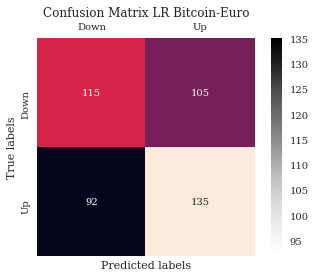

In [36]:
#Plotting Confusion Matrix of Logistic Regression result for assets digitize features as it outperform the most.

labels = ['Down', 'Up']
cm=confusion_matrix(df['Movement'], df["pos_d_lr"])
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d" , cbar=False, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix LR '+f'{name}'); 
ax.xaxis.set_ticklabels(['Down', 'Up']); ax.yaxis.set_ticklabels(['Down', 'Up']);

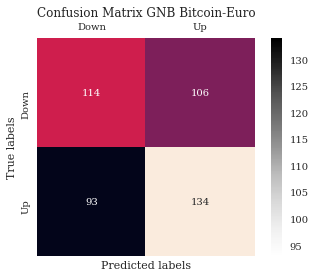

In [37]:
#Plotting Confusion Matrix of Naive Bayes result for assets digitize features as it outperform the most.

labels = ['Down', 'Up']
cm=confusion_matrix(df['Movement'], df["pos_d_gnb"])
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d" , cbar=False, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix GNB '+f'{name}'); 
ax.xaxis.set_ticklabels(['Down', 'Up']); ax.yaxis.set_ticklabels(['Down', 'Up']);

### Following code will show the different approach than the typical lag features

In [38]:
#Creating Rate of Change (ROC) as models feature.
roc=[1,2,3,4,5]
def create_ROC(data):
    global cols_roc
    cols_roc = []
    for r in roc:
        col = '{}D_roc'.format(r)
        df[col] =np.log(df["Close"].shift(1)/df["Close"].shift(r+1))
        cols_roc.append(col)

create_ROC(df)  

#Creating five days Moving Average (MA) as models feature.
ma = 5
def create_ma(data):
    global cols_ma
    cols_ma = []
    for m in range(1, ma + 1):
        col = 'ma_{}'.format(m)
        df[col] = df["Log_return"].shift(ma).rolling(5).mean()
        cols_ma.append(col)

create_ma(df)

#Transforming the ROC and MA features into the binary feature.
def create_bins_roc(data, bins=[0]):
    global cols_ma_bin,cols_roc_bin
    cols_roc_bin = []
    cols_ma_bin = []
    for col in cols_roc:
        col_roc_bin = col + '_bin'
        df[col_roc_bin] = np.digitize(df[col], bins=bins)
        cols_roc_bin.append(col_roc_bin)
    for col in cols_ma:
        col_ma_bin = col + '_bin'
        df[col_ma_bin] = np.digitize(df[col], bins=bins)
        cols_ma_bin.append(col_ma_bin)
        
create_bins_roc(df)

In [39]:
#Defining a function that fit into the model with five ROC lag Features

def fit_models_roc(data):
    mfit = {model: models[model].fit(df[cols_roc_bin],
                                    df['Movement'])
        for model in models.keys()}

#function that derives all position values from the fitted models using five ROC lag Features
def derive_positions_roc(data):
    for model in models.keys():
        df['pos_roc_' + model] = models[model].predict(df[cols_roc_bin])
        
#function that evaluates all resulting trading strategies using five ROC lag features.
def evaluate_strats_roc(data):
    global sel_roc
    sel_roc = []
    for model in models.keys():
        col = 'strat_roc_' + model
        df[col] = df['pos_roc_' + model] * df['Log_return']
        sel_roc.append(col)
    sel_roc.insert(0, 'Log_return')

# Appling ROC features into the model. 
fit_models_roc(df)

#Evaluating the model performence with applying five ROC features.
derive_positions_roc(df)

# deriving the positions of ROC features.
evaluate_strats_roc(df)

In [40]:
#Defining a function that fit into the model with five MA lag Features

def fit_models_ma(data):
    mfit = {model: models[model].fit(df[cols_ma_bin],
                                    df['Movement'])
        for model in models.keys()}

#function that derives all position values from the fitted models using five MA lag Features
def derive_positions_ma(data):
    for model in models.keys():
        df['pos_ma_' + model] = models[model].predict(df[cols_ma_bin])
        
#function that evaluates all resulting trading strategies using five ROC lag features.
def evaluate_strats_ma(data):
    global sel_ma
    sel_ma = []
    for model in models.keys():
        col = 'strat_ma_' + model
        df[col] = df['pos_ma_' + model] * df['Log_return']
        sel_ma.append(col)
    sel_ma.insert(0, 'Log_return')

# Appling MA features into the model.
fit_models_ma(df)

#Evaluating the model performence with applying five MA features.
derive_positions_ma(df)

# deriving the positions of MA features.
evaluate_strats_ma(df)

In [41]:
#Printing of returns of ROC and MA features that are used in Logistics regression and Naive bayes.
print(f'\nReturns for Logistic regression and Naive Bayes for ROC and MA lag Features')
print(f'\nReturns Using ROC Features')
print(df[sel_roc].sum().apply(np.exp).round(2))
print(f'\nReturns Using MA Features')
print(df[sel_ma].sum().apply(np.exp).round(2))
print(f'\nAnnual Volatility for Logistic Regression and Naive Bayes based on ROC and MA features')
print(f'\nVolatility Using ROC Features')
print(df[sel_roc].std() * 252 ** 0.5)
print(f'\nVolatility Using MA Features')
print(df[sel_ma].std() * 252 ** 0.5)


Returns for Logistic regression and Naive Bayes for ROC and MA lag Features

Returns Using ROC Features
Log_return       2.37
strat_roc_lr     5.59
strat_roc_gnb    3.16
dtype: float64

Returns Using MA Features
Log_return      2.37
strat_ma_lr     2.37
strat_ma_gnb    2.60
dtype: float64

Annual Volatility for Logistic Regression and Naive Bayes based on ROC and MA features

Volatility Using ROC Features
Log_return       0.619099
strat_roc_lr     0.616835
strat_roc_gnb    0.618507
dtype: float64

Volatility Using MA Features
Log_return      0.619099
strat_ma_lr     0.619099
strat_ma_gnb    0.618928
dtype: float64


Text(0.5, 1.0, 'Log Return vs Predicted Returns of Bitcoin-Euro')

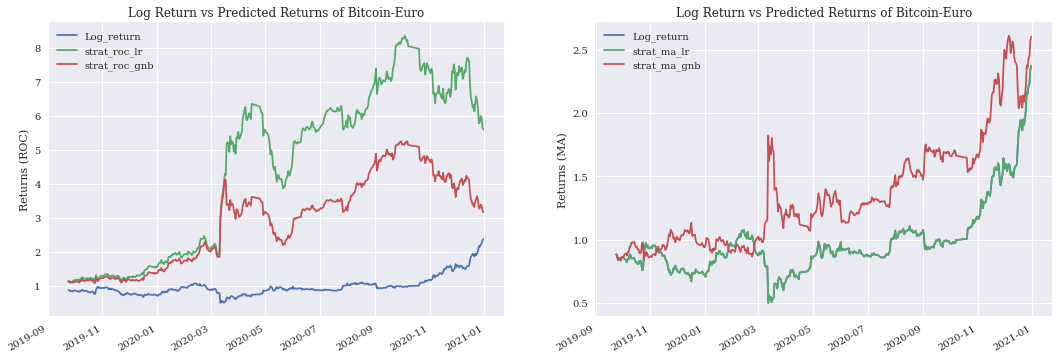

In [42]:
# Plotting assets Log Return and Model Predicted returns Over the time (MA and ROC features)
fig, ax =plt.subplots(1, 2, figsize=(18, 6))

# Plotting the Assets Return of Rate of change features.
df[sel_roc].cumsum().apply(np.exp).plot(ax=ax[0])
ax[0].set_ylabel('Returns (ROC)')
ax[0].set_xlabel('')
ax[0].set_title('Log Return vs Predicted Returns of '+ f'{name}')

# Plotting the Assets Return of Moving Average 
df[sel_ma].cumsum().apply(np.exp).plot(ax=ax[1])
ax[1].set_ylabel('Returns (MA)')
ax[1].set_xlabel('')
ax[1].set_title('Log Return vs Predicted Returns of '+ f'{name}')

## Performance Evaluatio with Trading cost (Simple Backtesting)

In [43]:
#Extracting predicted column for performence evaluation with certain portfolio amount.
df_evaluation=df[['strat_d_lr','strat_d_gnb']]

In [44]:
#transforming thepredicted log return the real return taking np.exp function.
df_evaluation['Return_d_lr']=df_evaluation['strat_d_lr'].apply(np.exp)
df_evaluation['Return_d_gnb']=df_evaluation['strat_d_gnb'].apply(np.exp)

In [45]:
#Selecting two portfolio with two different amount.
Portfolio_Amonunt_Higher = 100000
Portfolio_Amonunt_Lower = 10000
#define the amount independent trading cost 
Trading_cost = 9

In [46]:
#Creating Portfolio Column with and without trading cost for each model.
df_evaluation['pfolio_lr_cost_H']=0
df_evaluation['pfolio_lr_H']=0
df_evaluation['pfolio_gnb_cost_H']=0
df_evaluation['pfolio_gnb_H']=0
df_evaluation['pfolio_lr_cost_S']=0
df_evaluation['pfolio_lr_S']=0
df_evaluation['pfolio_gnb_cost_S']=0
df_evaluation['pfolio_gnb_S']=0

In [47]:
#To work with this df_evaluation index resetting is needed.
df_evaluation.reset_index(inplace=True)

In [48]:
#backtesting of Logistics regression prediction with trading cost where the portfolio amount is $100,000
for i in range (0, len(df_evaluation)):
    if i==0:
        df_evaluation.loc[i,'pfolio_lr_cost_H']= df_evaluation.loc[i,'Return_d_lr']*(Portfolio_Amonunt_Higher-Trading_cost),
    else:
         df_evaluation.loc[i,'pfolio_lr_cost_H']= (df_evaluation.loc[i,'Return_d_lr']*df_evaluation.loc[i-1,'pfolio_lr_cost_H'])-Trading_cost,

#backtesting of Logistics regression prediction without trading cost where the portfolio amount is $100,000
for i in range (0, len(df_evaluation)):
    if i==0:
        df_evaluation.loc[i,'pfolio_lr_H']= df_evaluation.loc[i,'Return_d_lr']*(Portfolio_Amonunt_Higher),
    else:
         df_evaluation.loc[i,'pfolio_lr_H']= (df_evaluation.loc[i,'Return_d_lr']*df_evaluation.loc[i-1,'pfolio_lr_H']),

#backtesting of Naive Bayes prediction with trading cost where the portfolio amount is $100,000           
for i in range (0, len(df_evaluation)):
    if i==0:
        df_evaluation.loc[i,'pfolio_gnb_cost_H']= df_evaluation.loc[i,'Return_d_gnb']*(Portfolio_Amonunt_Higher-9),
    else:
        df_evaluation.loc[i,'pfolio_gnb_cost_H']= (df_evaluation.loc[i,'Return_d_gnb']*df_evaluation.loc[i-1,'pfolio_gnb_cost_H'])-9,

#backtesting of Naive Bayes prediction without trading cost where the portfolio amount is $100,000   
for i in range (0, len(df_evaluation)):
    if i==0:
        df_evaluation.loc[i,'pfolio_gnb_H']= df_evaluation.loc[i,'Return_d_gnb']*(Portfolio_Amonunt_Higher),
    else:
         df_evaluation.loc[i,'pfolio_gnb_H']= (df_evaluation.loc[i,'Return_d_gnb']*df_evaluation.loc[i-1,'pfolio_gnb_H']),

In [49]:
#Calculate the returns with Trading cost where the portfolio amount $100,000

Return_With_Higher_Portfolio_LR= ((df_evaluation['pfolio_lr_cost_H'].iloc[-1])/Portfolio_Amonunt_Higher).round(2)
Return_With_Higher_Portfolio_GNB = ((df_evaluation['pfolio_gnb_cost_H'].iloc[-1])/Portfolio_Amonunt_Higher).round(2)

In [50]:
#backtesting of Logistics regression prediction with trading cost where the portfolio amount is $10,000
for i in range (0, len(df_evaluation)):
    if i==0:
        df_evaluation.loc[i,'pfolio_lr_cost_S']= df_evaluation.loc[i,'Return_d_lr']*(Portfolio_Amonunt_Lower-Trading_cost),
    else:
         df_evaluation.loc[i,'pfolio_lr_cost_S']= (df_evaluation.loc[i,'Return_d_lr']*df_evaluation.loc[i-1,'pfolio_lr_cost_S'])-Trading_cost,
    
#backtesting of Logistics regression prediction without trading cost where the portfolio amount is $10,000  
for i in range (0, len(df_evaluation)):
    if i==0:
        df_evaluation.loc[i,'pfolio_lr_S']= df_evaluation.loc[i,'Return_d_lr']*(Portfolio_Amonunt_Lower),
    else:
         df_evaluation.loc[i,'pfolio_lr_S']= (df_evaluation.loc[i,'Return_d_lr']*df_evaluation.loc[i-1,'pfolio_lr_S']),

#backtesting of Naive Bayes prediction with trading cost where the portfolio amount is $10,000            
for i in range (0, len(df_evaluation)):
    if i==0:
        df_evaluation.loc[i,'pfolio_gnb_cost_S']= df_evaluation.loc[i,'Return_d_gnb']*(Portfolio_Amonunt_Lower-Trading_cost),
    else:
        df_evaluation.loc[i,'pfolio_gnb_cost_S']= (df_evaluation.loc[i,'Return_d_gnb']*df_evaluation.loc[i-1,'pfolio_gnb_cost_S'])-Trading_cost,

#backtesting of Naive Bayes prediction without trading cost where the portfolio amount is $10,000          
for i in range (0, len(df_evaluation)):
    if i==0:
        df_evaluation.loc[i,'pfolio_gnb_S']= df_evaluation.loc[i,'Return_d_gnb']*(Portfolio_Amonunt_Lower),
    else:
         df_evaluation.loc[i,'pfolio_gnb_S']= (df_evaluation.loc[i,'Return_d_gnb']*df_evaluation.loc[i-1,'pfolio_gnb_S']),

In [51]:
#Calculate the returns with Trading cost where initial value is 10000

Return_With_Lower_Portfolio_LR= ((df_evaluation['pfolio_lr_cost_S'].iloc[-1])/Portfolio_Amonunt_Lower).round(2)
Return_With_Lower_Portfolio_GNB = ((df_evaluation['pfolio_gnb_cost_S'].iloc[-1])/Portfolio_Amonunt_Lower).round(2)

In [52]:
df_evaluation.tail()

,Date,strat_d_lr,strat_d_gnb,Return_d_lr,Return_d_gnb,pfolio_lr_cost_H,pfolio_lr_H,pfolio_gnb_cost_H,pfolio_gnb_H,pfolio_lr_cost_S,pfolio_lr_S,pfolio_gnb_cost_S,pfolio_gnb_S
442,2020-12-27,0.007223,0.007223,1.007249,1.007249,168170.288719,174219.009464,420208.503558,428185.743187,11373.180201,17421.900946,34841.334689,42818.574319
443,2020-12-28,0.029025,0.029025,1.029451,1.029451,173114.029875,179349.889983,432574.959207,440796.134527,11699.128890,17934.988998,35858.438132,44079.613453
444,2020-12-29,-0.007583,-0.007583,0.992446,0.992446,171797.261552,177995.013634,429298.125690,437466.195168,11601.749281,17799.501363,35578.550039,43746.619517
445,2020-12-30,-0.048952,-0.048952,0.952227,0.952227,163580.928107,169491.592710,408780.109231,416566.962536,11038.494667,16949.159271,33869.842948,41656.696254
446,2020-12-31,-0.012338,-0.012338,0.987738,0.987738,161566.045444,167413.231551,403758.514281,411458.882653,10894.137048,16741.323155,33445.519893,41145.888265


In [53]:
#Retursn without trading cost
print(f'\nReturns Using Five Digitize feature without Trading cost')
print(df[sel_d].sum().apply(np.exp).round(2))

#Retursn with trading cost
print('\nReturn where initial portfolio value $100,000')
print(f'Logistic Regression:',Return_With_Higher_Portfolio_LR)
print(f'Naive Bayes        :',Return_With_Higher_Portfolio_GNB)

print('\nReturn where initial portfolio value $10,000')
print(f'Logistic Regression:',Return_With_Lower_Portfolio_LR)
print(f'Naive Bayes        :',Return_With_Lower_Portfolio_GNB)



Returns Using Five Digitize feature without Trading cost
Log_return     2.37
strat_d_lr     1.67
strat_d_gnb    4.11
dtype: float64

Return where initial portfolio value $100,000
Logistic Regression: 1.62
Naive Bayes        : 4.04

Return where initial portfolio value $10,000
Logistic Regression: 1.09
Naive Bayes        : 3.34


In [54]:
df_evaluation.set_index("Date", inplace=True)
df_evaluation.index = pd.to_datetime(df.index)

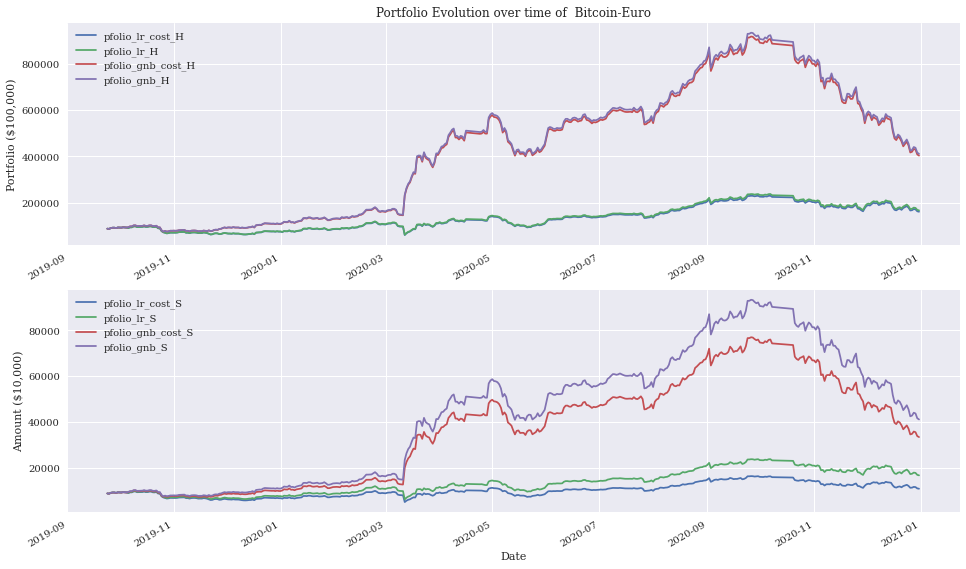

In [55]:
# Plotting evolution of the asset closing prices and Log returns over the time
fig, ax =plt.subplots(2, 1, figsize=(16, 10))

# Plotting the Assets closing price
df_evaluation[['pfolio_lr_cost_H','pfolio_lr_H','pfolio_gnb_cost_H','pfolio_gnb_H']].plot(ax=ax[0])
ax[0].set_ylabel('Portfolio ($100,000)')
ax[0].set_xlabel('')
ax[0].set_title('Portfolio Evolution over time of  '+ f'{name}')


# Plotting the Assets log return
df_evaluation[['pfolio_lr_cost_S','pfolio_lr_S','pfolio_gnb_cost_S','pfolio_gnb_S']].plot(ax=ax[1])
ax[1].set_ylabel('Amount ($10,000)')

plt.legend()
fig.show()


## Performance Evaluation using Backtrader

In [56]:
# Import Pyfolio, Backtrader for the performance analysis of asset.
import pyfolio as pf
import backtrader as bt
from backtrader.feeds import PandasData

In [57]:
#Defining the dataset for backtesting(only for Logistics regression)!
prices_lr=df[['Open','High','Low','Close','Volume']]

In [58]:
#Rename the column of the dataset to make compatible with backtrader (only for Logistics regression).
prices_lr.rename(columns = {'Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'},inplace=True)

#### Performance Evaluation for Logistic Regression With Trading Cost (0.09%)

In [59]:
# Add the predicted column to prices_lr dataframe. This will be used as signal for buy or sell for Logistics Regression 
predictions_lr = df['strat_d_lr']
predictions_lr = pd.DataFrame(predictions_lr)
predictions_lr.rename(columns = {'strat_d_lr':'predicted_lr'}, inplace=True)
prices_lr = predictions_lr.join(prices_lr, how='right').dropna()
prices_lr.head(2)

,predicted_lr,open,high,low,close,volume
Date,,,,,,
2019-09-24,-0.122875,8850.277344,8901.731445,7600.185547,7826.957031,2.270112e+10
2019-09-25,-0.010053,7811.396973,7984.072266,7601.128418,7748.666992,1.985305e+10


In [60]:
#rename the dataset to OHLCV format needed for backtrader (for logistics regression).
OHLCV_lr = ['open', 'high', 'low', 'close', 'volume']

In [61]:
# class to define the columns for LR

class SignalData_lr(PandasData):
    cols = OHLCV_lr+['predicted_lr']
    
# create lines
    lines = tuple(cols)
# define parameters
    params = {c: -1 for c in cols}
    params.update({'datetime': None})
    params = tuple(params.items())

The main Strategy is-

to buy the asset when the predicted value is +1(Positive) and sell (only if stock is in possession) when the predicted value is -1(Negative).

All-in strategy—when creating a buy order, buy as many shares as possible. However short selling is not allowed for the strategy.

In [62]:
# Specify backtesting strategy class for Logistic Regression to initialize the trading strategy
class MLStrategy_lr(bt.Strategy):
    params = dict(
    )
    
    def __init__(self):
    # keep track of open, close prices and predicted value in the series
        self.data_predicted_lr = self.datas[0].predicted_lr
        self.data_open = self.datas[0].open
        self.data_close = self.datas[0].close
        
    # keep track of pending orders/buy price/buy commission
        self.order = None
        self.price = None
        self.comm = None

    # logging function
    def log(self, txt):
        '''Logging function'''
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted - no action required
            return

        # report executed/completed order
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'Buy Completed - Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}'
                )
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
                self.log(f'Sell Completed - Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}'
                )

        # report failed order
        elif order.status in [order.Canceled, order.Margin, 
                              order.Rejected]:
            self.log('Order Failed')

        # set no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log(f'Operation Result - Gross Profit: {trade.pnl:.2f}, Net Profit: {trade.pnlcomm:.2f}')

    # calculate the number of shares that is wanted to buy based on day t+1's (Next Day) open price.
    # Buy as many shares as possible when the predicted price based on Logistic regression is greater than 0 (positive),
    # if the predicted price is less than 0 (negative) sell will be executed.
    def next_open(self):
        if not self.position:
            if self.data_predicted_lr > 0:
                # calculate the max number of shares ('all-in')
                size = int(self.broker.getcash() / self.datas[0].open)
                # buy order
                self.log(f'Buy Initiated - Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {self.data_open[0]}, Close: {self.data_close[0]}')
                self.buy(size=size)
        else:
            if self.data_predicted_lr < 0:
                # sell order
                self.log(f'Sell Initiated --- Size: {self.position.size}')
                self.sell(size=self.position.size)

In [63]:
# instantiate SignalData class
data = SignalData_lr(dataname=prices_lr)

In [64]:
# instantiate Cerebro, add strategy, data, set the initial cash, broker commission and pyfolio for performance analysis
# setting cheat_on_open = True.This means that it calculate the signals on day t's close price, 

cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
cerebro.addstrategy(MLStrategy_lr)
cerebro.adddata(data, name=f'{name}')
cerebro.broker.setcash(100000.0)
cerebro.broker.setcommission(commission=0.0009)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [65]:
# run the backtest to see how much money is getting at the end of the period.
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2019-09-26, Buy Initiated - Size: 12, Cash: 100000.00, Open: 7749.284668000001, Close: 7433.726562999999
2019-09-26, Buy Completed - Price: 7749.28, Cost: 92991.42,Commission: 83.69
2019-09-29, Sell Initiated --- Size: 12
2019-09-29, Sell Completed - Price: 7537.51, Cost: 92991.42,Commission: 81.41
2019-09-29, Operation Result - Gross Profit: -2541.26, Net Profit: -2706.36
2019-09-30, Buy Initiated - Size: 13, Cash: 97293.64, Open: 7405.64209, Close: 7609.142578
2019-09-30, Buy Completed - Price: 7405.64, Cost: 96273.35,Commission: 86.65
2019-10-01, Sell Initiated --- Size: 13
2019-10-01, Sell Completed - Price: 7614.51, Cost: 96273.35,Commission: 89.09
2019-10-01, Operation Result - Gross Profit: 2715.32, Net Profit: 2539.58
2019-10-03, Buy Initiated - Size: 13, Cash: 99833.23, Open: 7655.465331999999, Close: 7525.158203
2019-10-03, Buy Completed - Price: 7655.47, Cost: 99521.05,Commission: 89.57
2019-10-04, Sell Initiated --- Size: 13
2019-10-04, S

2020-11-13, Buy Initiated - Size: 17, Cash: 247393.04, Open: 13789.15625, Close: 13786.81836
2020-11-13, Buy Completed - Price: 13789.16, Cost: 234415.66,Commission: 210.97
2020-11-14, Sell Initiated --- Size: 17
2020-11-14, Sell Completed - Price: 13786.82, Cost: 234415.66,Commission: 210.94
2020-11-14, Operation Result - Gross Profit: -39.74, Net Profit: -461.66
2020-11-16, Buy Initiated - Size: 18, Cash: 246931.39, Open: 13469.730469999999, Close: 14095.125
2020-11-16, Buy Completed - Price: 13469.73, Cost: 242455.15,Commission: 218.21
2020-11-17, Sell Initiated --- Size: 18
2020-11-17, Sell Completed - Price: 14069.47, Cost: 242455.15,Commission: 227.93
2020-11-17, Operation Result - Gross Profit: 10795.39, Net Profit: 10349.26
2020-11-20, Buy Initiated - Size: 17, Cash: 257280.65, Open: 15015.77441, Close: 15705.17969
2020-11-20, Buy Completed - Price: 15015.77, Cost: 255268.16,Commission: 229.74
2020-11-21, Sell Initiated --- Size: 17
2020-11-21, Sell Completed - Price: 15705.18,

In [66]:
#Extract inputs for pyfolio
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.tail(3)

index
2020-12-29 00:00:00+00:00   -0.000945
2020-12-30 00:00:00+00:00    0.000000
2020-12-31 00:00:00+00:00    0.000000
Name: Strategy, dtype: float64

In [67]:
# get benchmark returns
benchmark_rets= df['Log_return']
benchmark_rets.index = benchmark_rets.index.tz_localize('UTC') 
benchmark_rets= benchmark_rets.filter(returns.index)
benchmark_rets.name = f'{name}'
benchmark_rets.head(3)

Date
2019-09-24 00:00:00+00:00   -0.122875
2019-09-25 00:00:00+00:00   -0.010053
2019-09-26 00:00:00+00:00   -0.041494
Name: Bitcoin-Euro, dtype: float64

In [68]:
# get performance statistics for Logistic Regression with Trading Cost
pf.show_perf_stats(returns)

Start date,2019-09-24
End date,2020-12-31
Total months,21
,Backtest
Annual return,88.4%
Cumulative returns,207.7%
Annual volatility,37.4%
Sharpe ratio,1.88
Calmar ratio,6.01
Stability,0.88
Max drawdown,-14.7%


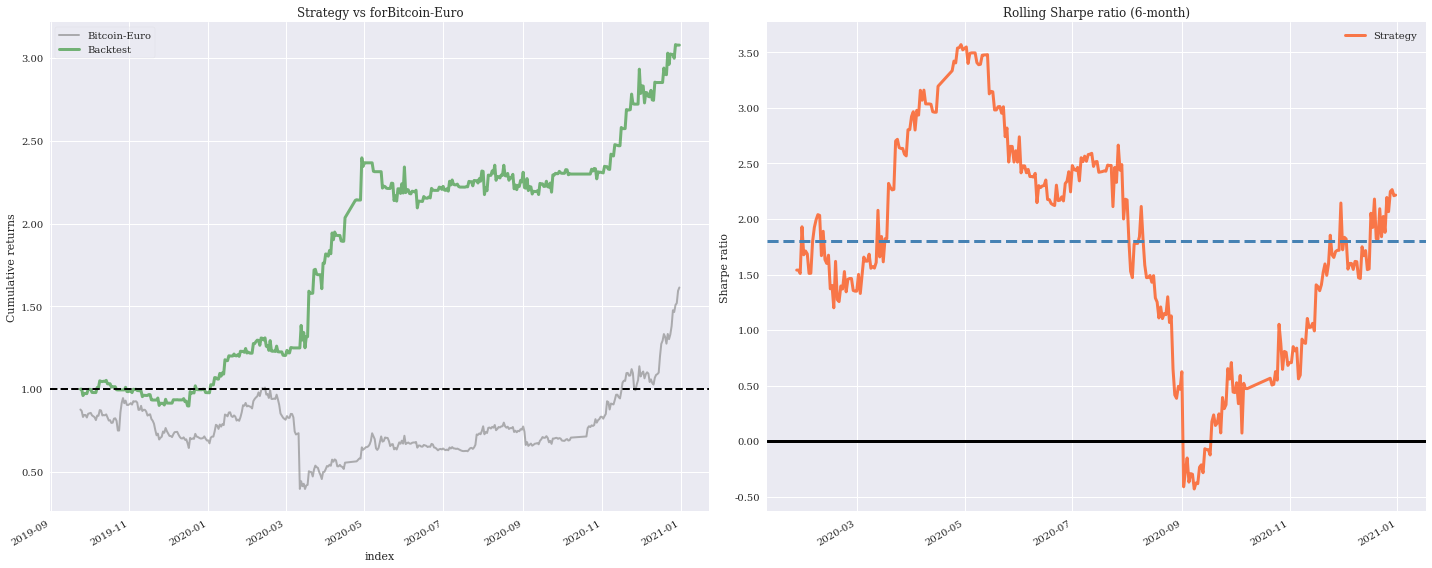

In [69]:
# plot performance for strategy vs benchmark for Logistics Regression with trading cost
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8),constrained_layout=False)
axes = ax.flatten()

pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[0], title='Strategy vs for'+f'{name}')
axes[0].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[1])
axes[1].grid(True)

plt.grid(True)
plt.legend()
plt.tight_layout()

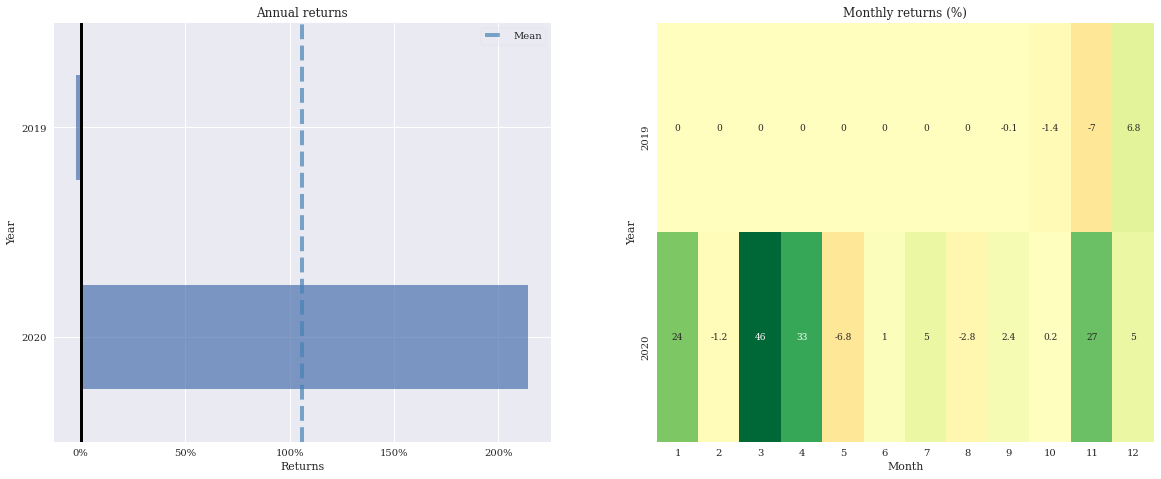

In [70]:
# plot performance for strategy vs benchmark for Logistics Regression with trading cost
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),constrained_layout=True)
axes = ax.flatten()

pf.plot_annual_returns(returns=returns, ax=axes[0])
axes[0].grid(True)

pf.plot_monthly_returns_heatmap(returns=returns, ax=axes[1],)

plt.tight_layout()

#### Performance Evaluation for Logistic Regression Without Trading Cost

In [71]:
# instantiate Cerebro, add strategy, data, initial cash, commission and pyfolio for performance analysis
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
cerebro.addstrategy(MLStrategy_lr)
cerebro.adddata(data, name=f'{name}')
cerebro.broker.setcash(100000.0)
cerebro.broker.setcommission(commission=0.0)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [72]:
# run the backtest
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2019-09-26, Buy Initiated - Size: 12, Cash: 100000.00, Open: 7749.284668000001, Close: 7433.726562999999
2019-09-26, Buy Completed - Price: 7749.28, Cost: 92991.42,Commission: 0.00
2019-09-29, Sell Initiated --- Size: 12
2019-09-29, Sell Completed - Price: 7537.51, Cost: 92991.42,Commission: 0.00
2019-09-29, Operation Result - Gross Profit: -2541.26, Net Profit: -2541.26
2019-09-30, Buy Initiated - Size: 13, Cash: 97458.74, Open: 7405.64209, Close: 7609.142578
2019-09-30, Buy Completed - Price: 7405.64, Cost: 96273.35,Commission: 0.00
2019-10-01, Sell Initiated --- Size: 13
2019-10-01, Sell Completed - Price: 7614.51, Cost: 96273.35,Commission: 0.00
2019-10-01, Operation Result - Gross Profit: 2715.32, Net Profit: 2715.32
2019-10-03, Buy Initiated - Size: 13, Cash: 100174.06, Open: 7655.465331999999, Close: 7525.158203
2019-10-03, Buy Completed - Price: 7655.47, Cost: 99521.05,Commission: 0.00
2019-10-04, Sell Initiated --- Size: 13
2019-10-04, Sell 

2020-05-22, Buy Initiated - Size: 29, Cash: 243225.35, Open: 8292.988281, Close: 8423.996094
2020-05-22, Buy Completed - Price: 8292.99, Cost: 240496.66,Commission: 0.00
2020-05-23, Sell Initiated --- Size: 29
2020-05-23, Sell Completed - Price: 8426.28, Cost: 240496.66,Commission: 0.00
2020-05-23, Operation Result - Gross Profit: 3865.33, Net Profit: 3865.33
2020-05-24, Buy Initiated - Size: 29, Cash: 247090.68, Open: 8451.24707, Close: 8058.640137
2020-05-24, Buy Completed - Price: 8451.25, Cost: 245086.17,Commission: 0.00
2020-05-28, Sell Initiated --- Size: 29
2020-05-28, Sell Completed - Price: 8337.63, Cost: 245086.17,Commission: 0.00
2020-05-28, Operation Result - Gross Profit: -3294.79, Net Profit: -3294.79
2020-05-29, Buy Initiated - Size: 28, Cash: 243795.89, Open: 8601.541992, Close: 8499.884766
2020-05-29, Buy Completed - Price: 8601.54, Cost: 240843.18,Commission: 0.00
2020-06-04, Sell Initiated --- Size: 28
2020-06-04, Sell Completed - Price: 8594.71, Cost: 240843.18,Comm

In [73]:
#Extract inputs for pyfolio
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)

index
2019-09-24 00:00:00+00:00    0.0
2019-09-25 00:00:00+00:00    0.0
Name: Strategy, dtype: float64

In [74]:
# get performance statistics for Logistic Regression without Trading Cost
pf.show_perf_stats(returns)

Start date,2019-09-24
End date,2020-12-31
Total months,21
,Backtest
Annual return,108.9%
Cumulative returns,269.5%
Annual volatility,37.5%
Sharpe ratio,2.15
Calmar ratio,8.61
Stability,0.90
Max drawdown,-12.7%


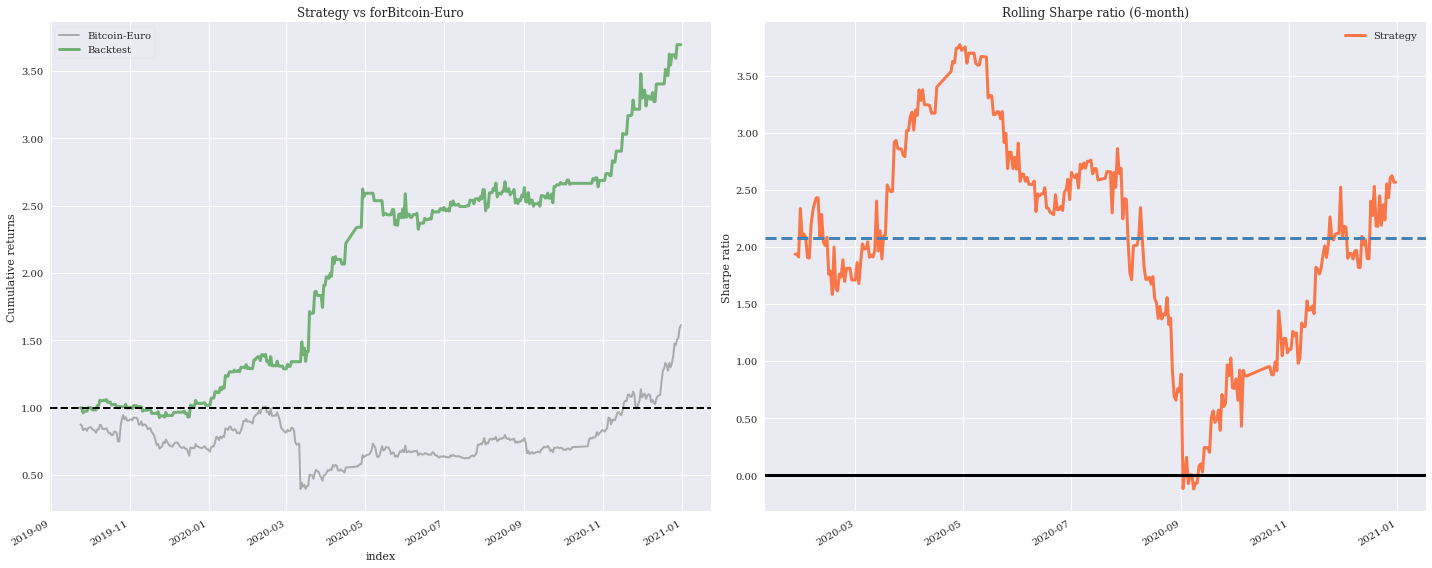

In [75]:
# plot performance for strategy vs benchmark for Logistics Regression without trading cost
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8),constrained_layout=False)
axes = ax.flatten()

pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[0], title='Strategy vs for'+f'{name}')
axes[0].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[1])
axes[1].grid(True)

plt.grid(True)
plt.legend()
plt.tight_layout()

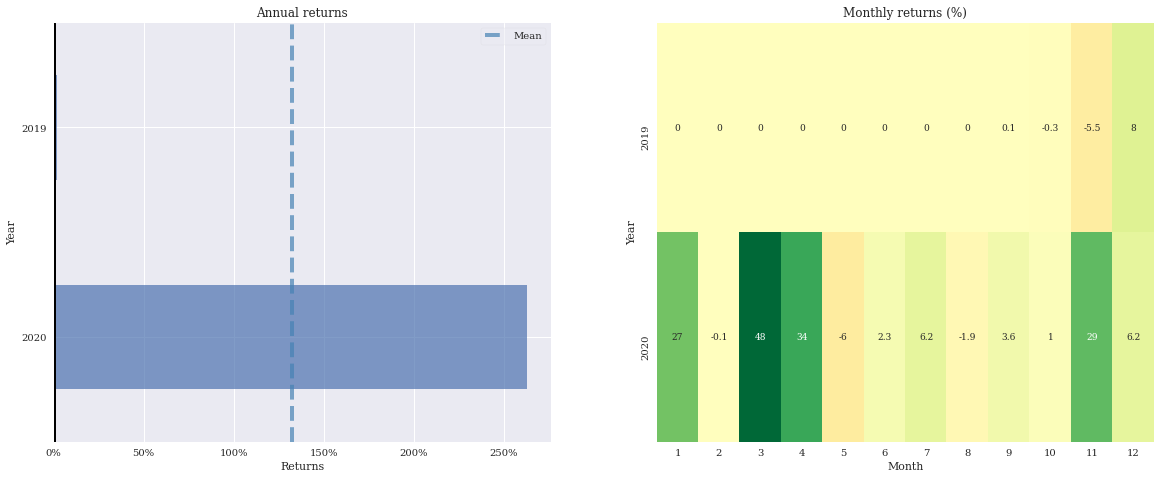

In [76]:
# plot performance for strategy vs benchmark for Logistics Regression without trading cost
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),constrained_layout=True)
axes = ax.flatten()

pf.plot_annual_returns(returns=returns, ax=axes[0])
axes[0].grid(True)

pf.plot_monthly_returns_heatmap(returns=returns, ax=axes[1],)

plt.tight_layout()

#### Performance Evaluation for Naive Bayes With Trading Cost (0.09%)

In [77]:
#Defining the dataset for backtesting(only for Naive Bayes)!
prices_gnb=df[['Open','High','Low','Close','Volume']]

In [78]:
#Rename the column of the dataset to make compatible with backtrader (only for Naive Bayes).
prices_gnb.rename(columns = {'Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'},inplace=True)

In [79]:
# Add the predicted column to prices_lr dataframe. This will be used as signal for buy or sell for Naive Bayes. 
predictions_gnb = df['strat_d_gnb']
predictions_gnb = pd.DataFrame(predictions_gnb)
predictions_gnb.rename(columns = {'strat_d_gnb':'predicted_gnb'}, inplace=True)
prices_gnb = predictions_gnb.join(prices_gnb, how='right').dropna()
prices_gnb.head()

,predicted_gnb,open,high,low,close,volume
Date,,,,,,
2019-09-24,-0.122875,8850.277344,8901.731445,7600.185547,7826.957031,2.270112e+10
2019-09-25,-0.010053,7811.396973,7984.072266,7601.128418,7748.666992,1.985305e+10
2019-09-26,0.041494,7749.284668,7796.961426,7229.238281,7433.726563,1.763281e+10
2019-09-27,0.014436,7428.355469,7559.797852,7280.494629,7541.815430,1.499703e+10
2019-09-28,0.000585,7541.292969,7573.691895,7427.270020,7537.401367,1.292610e+10


In [80]:
#rename the dataset to OHLCV format needed for backtrader (for naive bayes).
OHLCV_gnb = ['open', 'high', 'low', 'close', 'volume']

In [81]:
# class to define the columns we will provide (NB)

class SignalData_gnb(PandasData):
    cols = OHLCV_gnb+['predicted_gnb']
    
    # create lines
    lines = tuple(cols)
    # define parameters
    params = {c: -1 for c in cols}
    params.update({'datetime': None})

In [82]:
# define backtesting strategy class (NB)
class MLStrategy_gnb(bt.Strategy):
    params = dict(
    )
    
    def __init__(self):
        # keep track of open, close prices and predicted value in the series
        self.data_predicted_gnb = self.datas[0].predicted_gnb
        self.data_open = self.datas[0].open
        self.data_close = self.datas[0].close
        
        # keep track of pending orders/buy price/buy commission
        self.order = None
        self.price = None
        self.comm = None

    # logging function
    def log(self, txt):
        '''Logging function'''
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted - no action required
            return

        # report executed order
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'Buy Completed - Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}'
                )
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
                self.log(f'Sell Completed - Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}'
                )

        # report failed order
        elif order.status in [order.Canceled, order.Margin, 
                              order.Rejected]:
            self.log('Order Failed')

        # set no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log(f'Oeration Result - Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')

     # calculate the number of shares that is wanted to buy based on day t+1's (Next Day) open price.
    # Buy as many shares as possible when the predicted price based on Logistic regression is greater than 0 (positive),
    # if the predicted price is less than 0 (negative) sell will be executed.
    def next_open(self):
        if not self.position:
            if self.data_predicted_gnb > 0:
                # calculate the max number of shares ('all-in')
                size = int(self.broker.getcash() / self.datas[0].open)
                # buy order
                self.log(f'Buy Initiated - Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {self.data_open[0]}, Close: {self.data_close[0]}')
                self.buy(size=size)
        else:
            if self.data_predicted_gnb < 0:
                # sell order
                self.log(f'Sell Initiated - Size: {self.position.size}')
                self.sell(size=self.position.size)

In [83]:
# instantiate SignalData class (NB)
data = SignalData_gnb(dataname=prices_gnb)

In [84]:
# instantiate Cerebro, add strategy, data, set the initial cash, broker commission and pyfolio for performance analysis
# setting cheat_on_open = True.This means that it calculate the signals on day t's close price, 
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
cerebro.addstrategy(MLStrategy_gnb)
cerebro.adddata(data, name='name')
cerebro.broker.setcash(100000.0)
cerebro.broker.setcommission(commission=0.0009) 
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [85]:
# run the backtest using NB with Trading Cost
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2019-09-26, Buy Initiated - Size: 12, Cash: 100000.00, Open: 7749.284668000001, Close: 7433.726562999999
2019-09-26, Buy Completed - Price: 7749.28, Cost: 92991.42,Commission: 83.69
2019-09-29, Sell Initiated - Size: 12
2019-09-29, Sell Completed - Price: 7537.51, Cost: 92991.42,Commission: 81.41
2019-09-29, Oeration Result - Gross: -2541.26, Net: -2706.36
2019-09-30, Buy Initiated - Size: 13, Cash: 97293.64, Open: 7405.64209, Close: 7609.142578
2019-09-30, Buy Completed - Price: 7405.64, Cost: 96273.35,Commission: 86.65
2019-10-01, Sell Initiated - Size: 13
2019-10-01, Sell Completed - Price: 7614.51, Cost: 96273.35,Commission: 89.09
2019-10-01, Oeration Result - Gross: 2715.32, Net: 2539.58
2019-10-03, Buy Initiated - Size: 13, Cash: 99833.23, Open: 7655.465331999999, Close: 7525.158203
2019-10-03, Buy Completed - Price: 7655.47, Cost: 99521.05,Commission: 89.57
2019-10-04, Sell Initiated - Size: 13
2019-10-04, Sell Completed - Price: 7524.71, Cost

In [86]:
#Extract inputs for pyfolio for Naive Bayes with Trading Cost
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)

index
2019-09-24 00:00:00+00:00    0.0
2019-09-25 00:00:00+00:00    0.0
Name: Strategy, dtype: float64

In [87]:
# get performance statistics for Naive Bayes with Trading Cost
pf.show_perf_stats(returns)

Start date,2019-09-24
End date,2020-12-31
Total months,21
,Backtest
Annual return,40.6%
Cumulative returns,83.0%
Annual volatility,45.6%
Sharpe ratio,0.99
Calmar ratio,1.06
Stability,0.83
Max drawdown,-38.2%


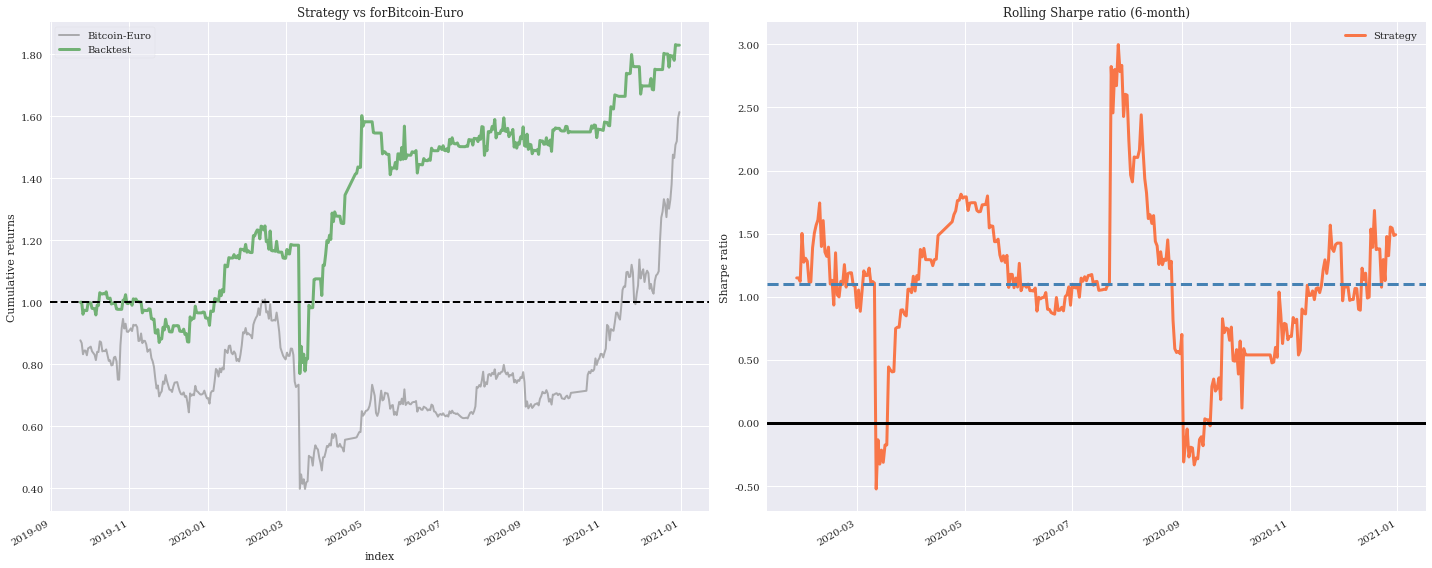

In [88]:
# plot performance for strategy vs benchmark for Naive Bayes with trading cost
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8),constrained_layout=False)
axes = ax.flatten()

pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[0], title='Strategy vs for'+f'{name}')
axes[0].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[1])
axes[1].grid(True)

plt.grid(True)
plt.legend()
plt.tight_layout()

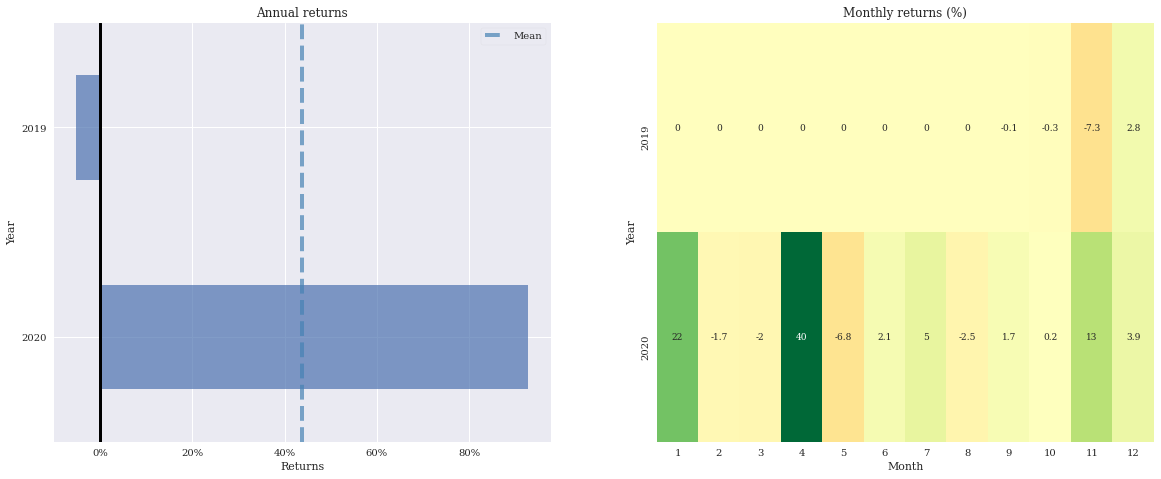

In [89]:
# plot performance for strategy vs benchmark for Naive Bayes with trading cost
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),constrained_layout=True)
axes = ax.flatten()

pf.plot_annual_returns(returns=returns, ax=axes[0])
axes[0].grid(True)

pf.plot_monthly_returns_heatmap(returns=returns, ax=axes[1],)

plt.tight_layout()

#### Performance Evaluation for Naive Bayes Without Trading Cost

In [90]:
# instantiate Cerebro, add strategy, data, initial cash, commission and pyfolio for performance analysis
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)
cerebro.addstrategy(MLStrategy_gnb)
cerebro.adddata(data, name=f'{name}')
cerebro.broker.setcash(100000.0)
cerebro.broker.setcommission(commission=0.0)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [91]:
# run the backtest for NB without Trading cost
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2019-09-26, Buy Initiated - Size: 12, Cash: 100000.00, Open: 7749.284668000001, Close: 7433.726562999999
2019-09-26, Buy Completed - Price: 7749.28, Cost: 92991.42,Commission: 0.00
2019-09-29, Sell Initiated - Size: 12
2019-09-29, Sell Completed - Price: 7537.51, Cost: 92991.42,Commission: 0.00
2019-09-29, Oeration Result - Gross: -2541.26, Net: -2541.26
2019-09-30, Buy Initiated - Size: 13, Cash: 97458.74, Open: 7405.64209, Close: 7609.142578
2019-09-30, Buy Completed - Price: 7405.64, Cost: 96273.35,Commission: 0.00
2019-10-01, Sell Initiated - Size: 13
2019-10-01, Sell Completed - Price: 7614.51, Cost: 96273.35,Commission: 0.00
2019-10-01, Oeration Result - Gross: 2715.32, Net: 2715.32
2019-10-03, Buy Initiated - Size: 13, Cash: 100174.06, Open: 7655.465331999999, Close: 7525.158203
2019-10-03, Buy Completed - Price: 7655.47, Cost: 99521.05,Commission: 0.00
2019-10-04, Sell Initiated - Size: 13
2019-10-04, Sell Completed - Price: 7524.71, Cost: 99

2020-09-17, Buy Completed - Price: 9297.00, Cost: 167346.00,Commission: 0.00
2020-09-21, Sell Initiated - Size: 18
2020-09-21, Sell Completed - Price: 9230.24, Cost: 167346.00,Commission: 0.00
2020-09-21, Oeration Result - Gross: -1201.75, Net: -1201.75
2020-09-22, Buy Initiated - Size: 19, Cash: 170105.88, Open: 8890.231445, Close: 9001.320313
2020-09-22, Buy Completed - Price: 8890.23, Cost: 168914.40,Commission: 0.00
2020-09-27, Sell Initiated - Size: 19
2020-09-27, Sell Completed - Price: 9244.67, Cost: 168914.40,Commission: 0.00
2020-09-27, Oeration Result - Gross: 6734.29, Net: 6734.29
2020-09-30, Buy Initiated - Size: 19, Cash: 176840.17, Open: 9236.581055, Close: 9202.3125
2020-09-30, Buy Completed - Price: 9236.58, Cost: 175495.04,Commission: 0.00
2020-10-01, Sell Initiated - Size: 19
2020-10-01, Sell Completed - Price: 9200.09, Cost: 175495.04,Commission: 0.00
2020-10-01, Oeration Result - Gross: -693.35, Net: -693.35
2020-10-04, Buy Initiated - Size: 19, Cash: 176146.82, Ope

In [92]:
#Extract inputs for pyfolio for NB without Trading cost
strat = backtest_result[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)

index
2019-09-24 00:00:00+00:00    0.0
2019-09-25 00:00:00+00:00    0.0
Name: Strategy, dtype: float64

In [93]:
# get performance statistics for Naive Bayes without Trading Cost
pf.show_perf_stats(returns)

Start date,2019-09-24
End date,2020-12-31
Total months,21
,Backtest
Annual return,55.2%
Cumulative returns,118.2%
Annual volatility,46.6%
Sharpe ratio,1.20
Calmar ratio,1.42
Stability,0.88
Max drawdown,-38.9%


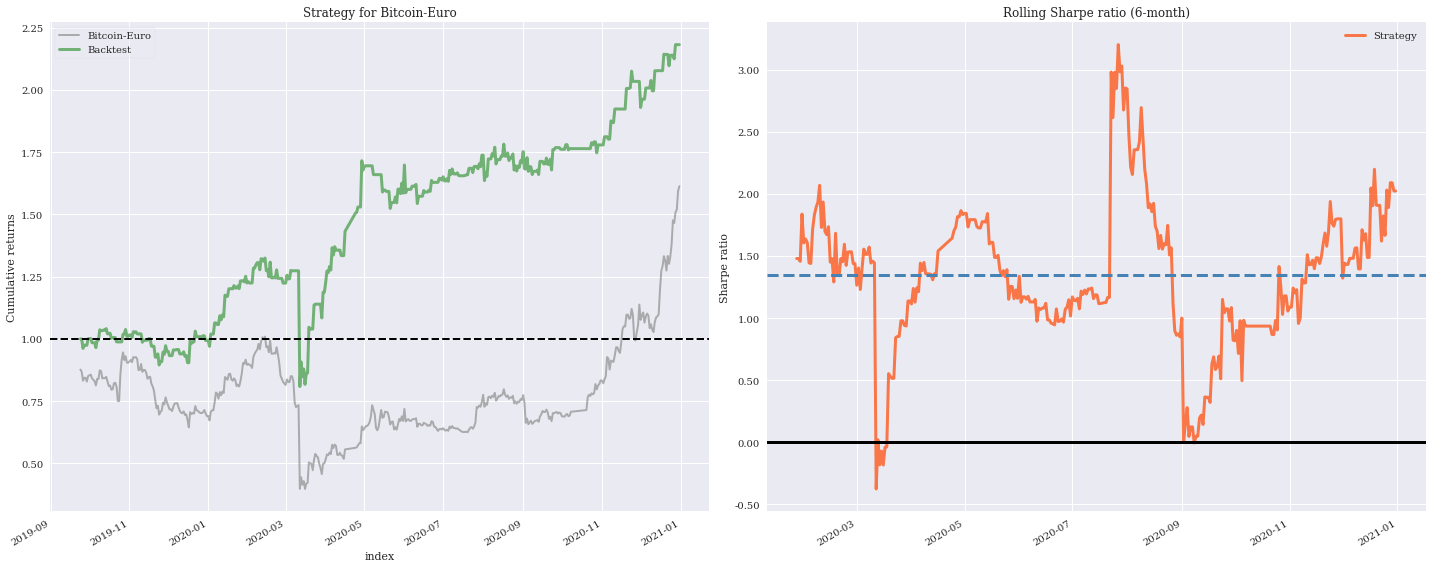

In [94]:
# plot performance for strategy vs benchmark for Naive Bayes without trading cost
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8),constrained_layout=False)
axes = ax.flatten()

pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[0], title='Strategy for '+f'{name}')
axes[0].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[1])
axes[1].grid(True)

plt.grid(True)
plt.legend()
plt.tight_layout()

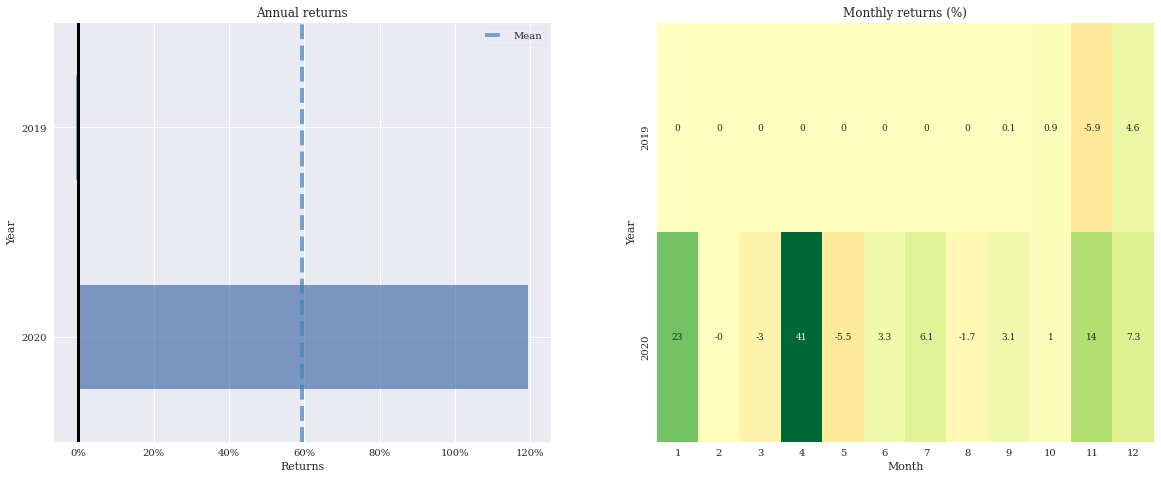

In [95]:
# plot performance for strategy vs benchmark for Naive Bayes without trading cost
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),constrained_layout=True)
axes = ax.flatten()

pf.plot_annual_returns(returns=returns, ax=axes[0])
axes[0].grid(True)

pf.plot_monthly_returns_heatmap(returns=returns, ax=axes[1])

plt.tight_layout()